In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
df_trans = pd.read_csv("MoMo_analysis/MOMO_DATA-TRANSACTION.csv")
df_user = pd.read_csv("MoMo_analysis/MOMO_USER.csv")
df_commission = pd.read_csv("MoMo_analysis/MOMO_DATA_COMMISSION.csv")

In [30]:
def dataset_observation(dataset):
    for i in dataset.columns:
        rate = dataset[i].isna().sum() / len(dataset) * 100
        if rate > 0: print('The missing rate of {} is {}'.format(i, round(rate, 2)))

In [31]:
title=['Data Transactions', 'Users Data', 'Commission']
for i, dataset in enumerate([df_trans, df_user,df_commission]):
    print('-'*10 + title[i] + '-'*10)
    dataset_observation(dataset)
    print()
    dataset.info()
    print()

----------Data Transactions----------
The missing rate of Purchase_status is 83.44

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          13495 non-null  int64 
 1   order_id         13495 non-null  int64 
 2   Date             13495 non-null  object
 3   Amount           13495 non-null  int64 
 4   Merchant_id      13495 non-null  int64 
 5   Purchase_status  2235 non-null   object
dtypes: int64(4), object(2)
memory usage: 632.7+ KB

----------Users Data----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_id          13428 non-null  int64 
 1   First_tran_date  13428 non-null  object
 2   Location         13428 non-null  object
 3   Age              13428 no

-> 1 Missing in Purchase status but we do not use it now so I won't clean it yet

# Processing

1. Using data from the 'Commission' table, add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order, and then calculate MoMo's total revenue in January 2020.
2. What is MoMo's most profitable month?
3. What day of the week does MoMo make the most money, on average? The least money?
4. Combined with the 'User_Info' table, add columns: Age, Gender, Location, Type_user (New/Current) in 'Transactions' table and calculate the total number of new users in December 2020.
   New = the transaction was in the month of the first time the user used Topup; Current = the user had used Topup before that month)

In [32]:
df_trans.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status
0,21269588,4169517626,2020-01-01,10000,13,NaN
1,28097592,4170276686,2020-01-01,20000,13,NaN
2,47435144,4166729310,2020-01-01,10000,12,NaN
3,29080935,4174460303,2020-01-01,10000,13,NaN
4,14591075,4168216749,2020-01-01,10000,12,NaN


In [33]:
df_commission.head()

,Merchant_name,Merchant_id,Rate_pct
0,Viettel,12.0,2.0
1,Mobifone,13.0,3.0
2,Vinaphone,14.0,4.0
3,Vietnamobile,15.0,4.0
4,Gmobile,16.0,4.0


## 1. Total Revenue

In [34]:
df = df_trans.copy()

In [40]:
df['Rate_pct'] = df['Merchant_id'].apply(lambda x: 2 if x == 12 else
                                        3 if x== 13 else 4)
df["Revenue"] = df["Amount"] * df["Rate_pct"]
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['add_month'] = df['Date'].dt.month

In [41]:
df.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,Rate_pct,Revenue,add_month
0,21269588,4169517626,2020-01-01,10000,13,NaN,3,30000,1
1,28097592,4170276686,2020-01-01,20000,13,NaN,3,60000,1
2,47435144,4166729310,2020-01-01,10000,12,NaN,2,20000,1
3,29080935,4174460303,2020-01-01,10000,13,NaN,3,30000,1
4,14591075,4168216749,2020-01-01,10000,12,NaN,2,20000,1


In [50]:
jan_rev = df[df['add_month']== 1]
jan_total_rev = sum(jan_rev['Revenue'])

In [51]:
jan_total_rev

140982702

## Most Profitable Month

In [80]:
grouped = df[['Date', 'Revenue']]
grouped.set_index('Date', inplace=True)
monthly_revenue = grouped.resample('M').sum()
print(monthly_revenue)
\
print(monthly_revenue.nlargest(3,'Revenue'))

              Revenue
Date                 
2020-01-31  140982702
2020-02-29  137850000
2020-03-31  158400000
2020-04-30  148830000
2020-05-31  146370000
2020-06-30  161720000
2020-07-31  158190000
2020-08-31  161870000
2020-09-30  170220000
2020-10-31  169090000
2020-11-30  153930000
2020-12-31  163820000
              Revenue
Date                 
2020-09-30  170220000
2020-10-31  169090000
2020-12-31  163820000


## Most Profitable Week and Day

In [82]:
weekly_revenue = grouped.resample('W').sum()
print(weekly_revenue)

             Revenue
Date                
2020-01-05  18070000
2020-01-12  31152702
2020-01-19  32290000
2020-01-26  33930000
2020-02-02  33970000
2020-02-09  33330000
2020-02-16  30370000
2020-02-23  28640000
2020-03-01  41150000
2020-03-08  28990000
2020-03-15  38610000
2020-03-22  40400000
2020-03-29  35520000
2020-04-05  31120000
2020-04-12  38180000
2020-04-19  30040000
2020-04-26  34850000
2020-05-03  37760000
2020-05-10  28970000
2020-05-17  33700000
2020-05-24  35040000
2020-05-31  36350000
2020-06-07  36240000
2020-06-14  37310000
2020-06-21  32720000
2020-06-28  41090000
2020-07-05  33380000
2020-07-12  37080000
2020-07-19  31450000
2020-07-26  36620000
2020-08-02  41250000
2020-08-09  38580000
2020-08-16  37380000
2020-08-23  36000000
2020-08-30  34910000
2020-09-06  40760000
2020-09-13  37510000
2020-09-20  36740000
2020-09-27  42910000
2020-10-04  40340000
2020-10-11  34070000
2020-10-18  37480000
2020-10-25  38400000
2020-11-01  41570000
2020-11-08  32890000
2020-11-15  3

In [88]:
dw_group = df[['Date', 'Revenue']]
dw_group['Date'] = pd.to_datetime(dw_group['Date'])
dw_group['Day_Week'] = dw_group['Date'].dt.day_name()

avg_revenue_by_day = dw_group.groupby('Day_Week')['Revenue'].mean()

most_profit_day = avg_revenue_by_day.idxmax()
least_profit_day = avg_revenue_by_day.idxmin()

print("Average Revenue by Day of Week:\n", avg_revenue_by_day)
print(f"\nDay with Most Revenue: {most_profit_day} (${avg_revenue_by_day.max():,.2f})")
print(f"Day with Least Revenue: {least_profit_day} (${avg_revenue_by_day.min():,.2f})")

Average Revenue by Day of Week:
 Day_Week
Friday       140821.304131
Monday       130443.756450
Saturday     137609.994568
Sunday       130804.240814
Thursday     141119.059785
Tuesday      140135.841170
Wednesday    148253.507499
Name: Revenue, dtype: float64

Day with Most Revenue: Wednesday ($148,253.51)
Day with Least Revenue: Monday ($130,443.76)


In [118]:
df_user.rename(columns={'User_id': 'user_id'}, inplace=True)
new_user_df = pd.merge(df_trans, df_user, on='user_id', how='outer')
new_user_df.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,First_tran_date,Location,Age,Gender
0,21269588,4169517626,2020-01-01,10000,13,NaN,2018-12-11,HN,>37,FEMALE
1,28097592,4170276686,2020-01-01,20000,13,NaN,2019-12-30,HN,>37,FEMALE
2,47435144,4166729310,2020-01-01,10000,12,NaN,2019-11-11,HN,18_to_22,female
3,29080935,4174460303,2020-01-01,10000,13,NaN,2019-10-24,HN,18_to_22,female
4,14591075,4168216749,2020-01-01,10000,12,NaN,2019-12-28,Other Cities,18_to_22,FEMALE


In [119]:
new_user_df['Date'] = pd.to_datetime(new_user_df['Date'])
new_user_df['First_tran_date'] = pd.to_datetime(new_user_df['First_tran_date'], errors='coerce')


new_user_df['Current_tran_date'] = new_user_df['Date'].dt.to_period('M')
new_user_df['First_tran'] = new_user_df['First_tran_date'].dt.to_period('M')

new_user_df['Category'] = new_user_df.apply(lambda x: 'New' if x['Current_tran_date'] == x['First_tran'] else 
                                            'Current', axis=1)


In [120]:
december2020_new_users = new_user_df[(new_user_df['Category'] == 'New') & \
(new_user_df['Current_tran_date'].dt.month == 12) & \
(new_user_df['Current_tran_date'].dt.year == 2020)]

total_new_users = december2020_new_users.shape[0]

print("Total number of new users in December 2020:", total_new_users)

Total number of new users in December 2020: 75


# Visualization
Summary: total users, gender, new users
Time Frame: Top month, year
Revenue: monthly, yearly, ARPU

In [121]:
data = pd.merge(df_trans, df_user, on='user_id', how='outer')

In [130]:
data['Gender'] = data['Gender'].str.replace('Nữ', 'FEMALE')
data['Gender'] = data['Gender'].str.upper()

In [131]:
data.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,First_tran_date,Location,Age,Gender
0,21269588,4169517626,2020-01-01,10000,13,NaN,2018-12-11,HN,>37,FEMALE
1,28097592,4170276686,2020-01-01,20000,13,NaN,2019-12-30,HN,>37,FEMALE
2,47435144,4166729310,2020-01-01,10000,12,NaN,2019-11-11,HN,18_to_22,FEMALE
3,29080935,4174460303,2020-01-01,10000,13,NaN,2019-10-24,HN,18_to_22,FEMALE
4,14591075,4168216749,2020-01-01,10000,12,NaN,2019-12-28,Other Cities,18_to_22,FEMALE


In [132]:
data['Age'].sort_values().unique()

array(['18_to_22', '23_to_27', '28_to_32', '33_to_37', '>37', 'unknown'],
      dtype=object)

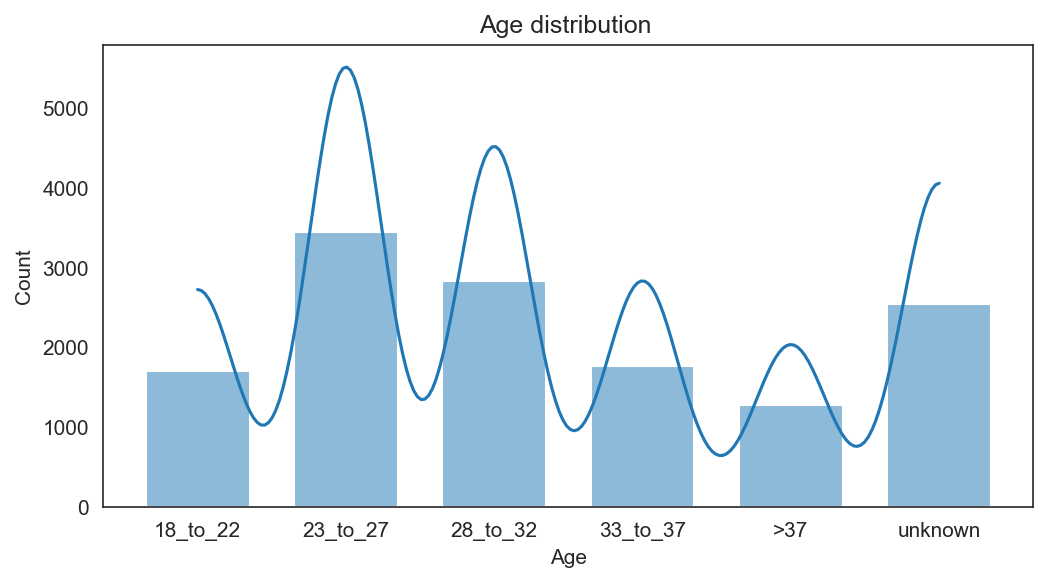

In [134]:
data = data.sort_values(by ='Age', ascending=True)
plt.figure(dpi=150, figsize=(8,4))
sns.set_style("white")
sns.histplot(data,
            x='Age',
             kde=True,
             palette='bmh',  shrink=.7, color='C0')
            
plt.title('Age distribution ')
plt.show()

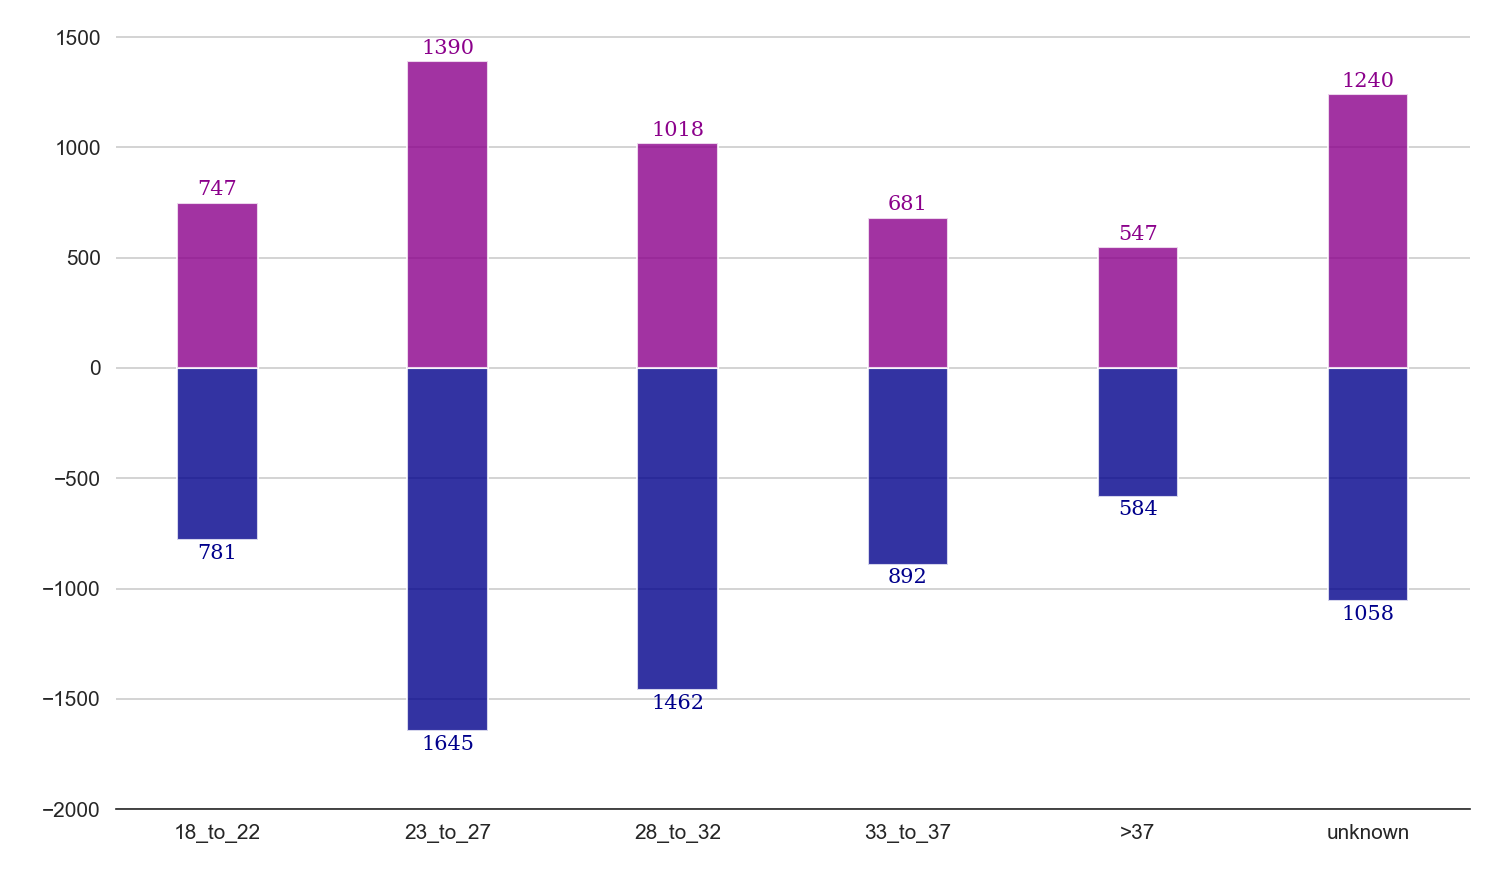

In [278]:
age_range_gender = data.groupby(['Gender']).Age.value_counts().unstack().fillna(0).astype(int)
    
male = - age_range_gender.loc['MALE']
female = age_range_gender.loc['FEMALE']

fig, ax = plt.subplots(figsize=(10,6), dpi=150, facecolor='white')
ax.bar(male.index, male, alpha=0.8, width=0.35, label= 'Male', color='darkblue')
ax.bar(female.index, female, alpha=0.8, width=0.35, label= 'Female', color='darkmagenta')

for i in male.index:
    ax.annotate(f"{-male[i]}", 
                   xy=(i, male[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='darkblue')   

for i in female.index:
    ax.annotate(f"{female[i]}", 
                   xy=(i, female[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='darkmagenta')
ax.set_xlabel(" ")
ax.set_ylabel(' ')
ax.set_xticks(male.index)
ax.set_ylim(-2000,1600)

ax.spines[['right', 'top','left']].set_visible(False)

plt.grid(visible=True, axis="y")
ax.legend().set_visible(False)
plt.savefig("MoMo_analysis/gender_dist", bbox_inches='tight', dpi=300)
plt.tight_layout()

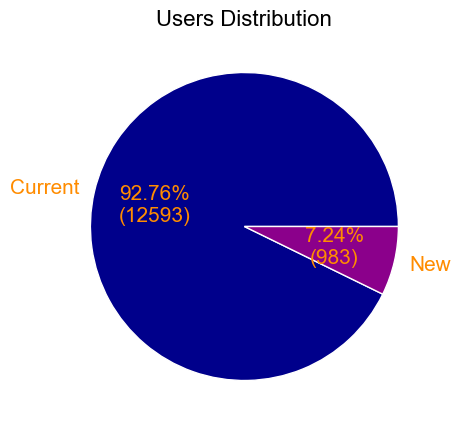

In [304]:
types = new_user_df.groupby('Category').size()

fig, ax = plt.subplots(figsize=(5,5))
types.plot.pie(ax=ax, colors=['darkblue','darkmagenta'],textprops={'fontsize': 15, 'color': 'darkorange'}, 
               autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, (p/100)*types.sum()))
plt.title('Users Distribution', fontsize=16, color='Black')
plt.savefig("MoMo_analysis/users", bbox_inches='tight', dpi=300)
plt.show()

In [164]:
users_df = new_user_df.copy()
users_df['Gender'] = users_df['Gender'].str.replace('Nữ', 'FEMALE')
users_df['Gender'] = users_df['Gender'].str.upper()

data_new = users_df[['Category', 'Gender']].groupby('Category')['Gender'].value_counts().unstack()

data_new['sum'] = data_new.sum(axis=1)
data_new_ratio = (data_new.T / data_new['sum']).T[['MALE', 'FEMALE']].sort_values(by='FEMALE',ascending=False)[::-1]

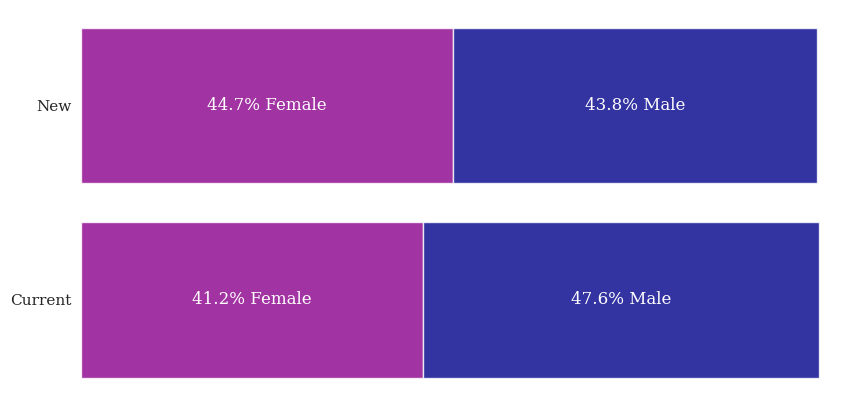

In [305]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.barh(data_new_ratio.index, data_new_ratio['FEMALE'], 
        color='darkmagenta', alpha=0.8, label='FEMALE')

ax.barh(data_new_ratio.index, data_new_ratio['MALE'], left=data_new_ratio['FEMALE'], 
        color='darkblue', alpha=0.8, label='MALE')

ax.set_yticklabels(data_new_ratio.index, fontfamily='serif', fontsize=11)
ax.set_xticks([])

for i in data_new_ratio.index:
    ax.annotate(f"{data_new_ratio['FEMALE'][i]*100:.3}% Female",
                   xy=(data_new_ratio['FEMALE'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')


for i in data_new_ratio.index:
    ax.annotate(f"{data_new_ratio['MALE'][i]*100:.3}% Male", 
                   xy=(data_new_ratio['FEMALE'][i]+data_new_ratio['MALE'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

ax.spines[:].set_visible(False)
ax.legend().set_visible(False)
plt.savefig("MoMo_analysis/users_gender", bbox_inches='tight', dpi=300)
plt.show()


In [265]:
time = monthly_revenue.copy()

quarterly_sum = time.resample('Q').sum()
print(quarterly_sum)

              Revenue
Date                 
2020-03-31  437232702
2020-06-30  456920000
2020-09-30  490280000
2020-12-31  486840000


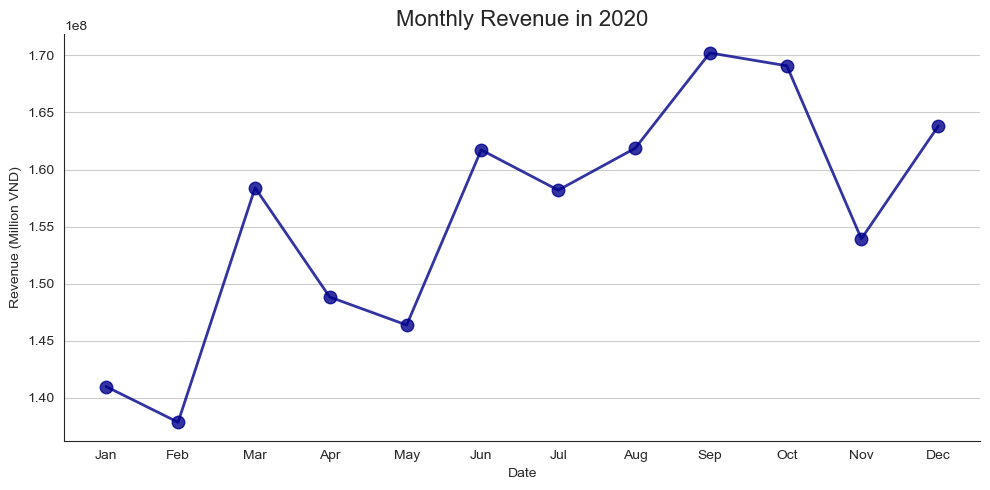

In [308]:

fig, ax = plt.subplots(1, 1, figsize=(10,5))
plt.plot(time['Date'],time['Revenue'], '-', linewidth=2, marker='o', markersize=9, color='darkblue', alpha=0.8)

ax.spines[['right', 'top']].set_visible(False)
plt.xticks(time['Date'], time['Date'].dt.strftime('%b'))
plt.title('Monthly Revenue in 2020', fontsize=16)
plt.ylabel('Revenue (Million VND)')
plt.xlabel('Date')
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("MoMo_analysis/monthly_rev", bbox_inches='tight', dpi=300)
plt.show()

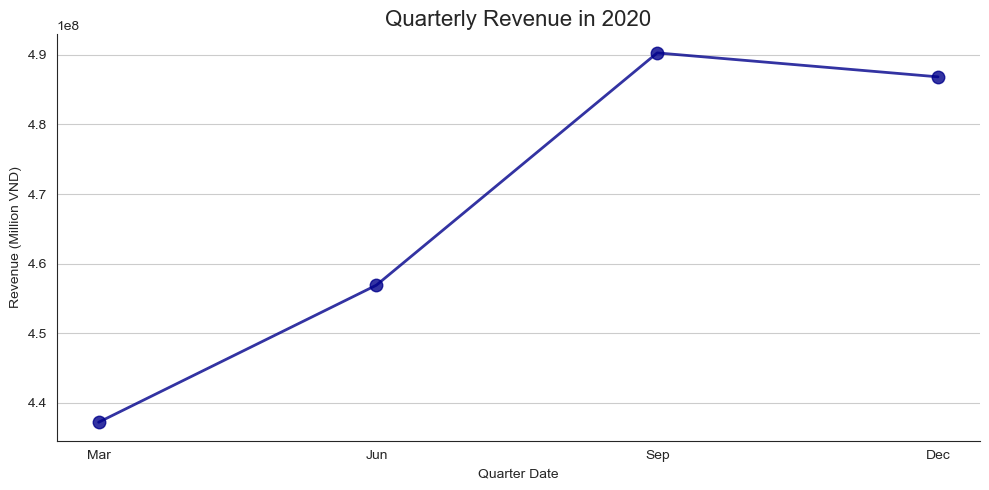

In [309]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(quarterly_sum['Date'],quarterly_sum['Revenue'], '-', linewidth=2, marker='o', markersize=9, color='darkblue', alpha=0.8)

ax.spines[['right', 'top']].set_visible(False)
plt.xticks(quarterly_sum['Date'], quarterly_sum['Date'].dt.strftime('%b'))
plt.title('Quarterly Revenue in 2020', fontsize=16)
plt.ylabel('Revenue (Million VND)')
plt.xlabel('Quarter Date')
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("MoMo_analysis/quarter_rev", bbox_inches='tight', dpi=300)
plt.show()

,Date,Revenue
0,2020-03-31,437232702
1,2020-06-30,456920000
2,2020-09-30,490280000
3,2020-12-31,486840000


In [267]:
time

,Revenue
Date,
2020-01-31,140982702
2020-02-29,137850000
2020-03-31,158400000
2020-04-30,148830000
2020-05-31,146370000
2020-06-30,161720000
2020-07-31,158190000
2020-08-31,161870000
2020-09-30,170220000
